# Neural Networks and Learning Course
----------------------------------------------------------
# Mushroom Recommender Projet
----------------------------------------------------------
# By Begum SARIGUZEL

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
mushroom = pd.read_csv("mushrooms.csv")


In [3]:
mushroom.drop(['gill-attachment'],axis=1,inplace=True)
mushroom.drop(['veil-color'],axis=1,inplace=True)
mushroom.drop(['ring-number'],axis=1,inplace=True)

In [4]:
mushroom[mushroom.columns] = mushroom[mushroom.columns].astype('category')

In [5]:
labelen = LabelEncoder()
mushroom_encode = mushroom[mushroom.columns].apply(lambda col: labelen.fit_transform(col))

In [6]:
mushroom.drop(['veil-type'],axis=1,inplace=True)
mushroom_encode.drop(['veil-type'],axis=1,inplace=True)

In [7]:
target = mushroom_encode['class']
#mushroom.drop(['class'],axis=1,inplace=True)
mushroom_encode.drop(['class'],axis=1,inplace=True)

In [8]:
mushroom_preprocessed = pd.get_dummies(mushroom)


In [9]:
labelen = LabelEncoder()
y = labelen.fit_transform(target)

### SVC for all data

##### Normalization of the data

In [128]:
mushroom_preprocessed = StandardScaler(with_mean=True, with_std=True).fit_transform(mushroom_preprocessed)

##### Splitting the data considering 30% of testing size

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_preprocessed,y, test_size=0.3,random_state=42)

##### Choosing the linear SVC model

In [19]:
modelSVC = LinearSVC(max_iter=3000)

##### Training the model

In [23]:
modelSVC.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

##### Testing

In [24]:
predictions_SVC = modelSVC.predict(X_test)

##### Evaluating the model

In [26]:
print(confusion_matrix(y_test,predictions_SVC))

[[1257    0]
 [   0 1181]]


In [27]:
print(classification_report(y_test,predictions_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [28]:
kf = KFold(n_splits=10, shuffle=True, random_state=123)
cross_val_score(modelSVC, mushroom_preprocessed, y, cv=kf).mean()

1.0

In [29]:
print('Training accuracy', np.mean(modelSVC.predict(X_train) == y_train)*100)
print('Test accuracy', np.mean(modelSVC.predict(X_test) == y_test)*100)

Training accuracy 100.0
Test accuracy 100.0


##### Learning curves 
It shows the accuracy for training and valdiation sets for each time when cross validation divides the data into k-fold (I chose k as 10).

In [30]:
train_sizes, train_scores, validation_scores = learning_curve(LinearSVC(),
                                mushroom_preprocessed,y, train_sizes=np.linspace(.1, 1., 10), cv=10,shuffle=True)
train_sizes            
train_scores           
validation_scores           


array([[0.68511685, 1.        , 0.99876999, 0.99507995, 0.99384994,
        1.        , 1.        , 1.        , 0.69913687, 0.98273736],
       [0.77367774, 1.        , 0.99876999, 0.99507995, 1.        ,
        1.        , 1.        , 1.        , 0.88532676, 1.        ],
       [0.69495695, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9432799 , 1.        ],
       [0.68511685, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.93588163, 1.        ],
       [0.71709717, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.92108508, 1.        ],
       [0.92127921, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91861899, 1.        ],
       [0.91758918, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91368681, 1.        ],
       [0.90159902, 1.        , 1.       

(0.6, 1.1)

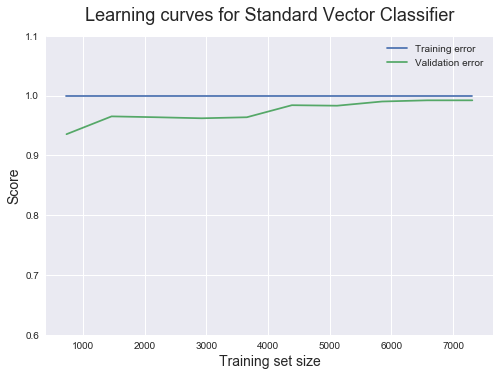

In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Standard Vector Classifier', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.1)

#### With small data 

In [10]:
no_odor = mushroom[mushroom['odor'].isin(['n'])]
no_odor_w = no_odor[no_odor['spore-print-color'].isin(['w'])]
(len(mushroom.index) - len(no_odor_w.index)) / len(mushroom.index)

0.9231905465288035

In [11]:
no_odor_encode = no_odor_w[no_odor_w.columns].apply(lambda col: labelen.fit_transform(col))
no_odor_encode

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
3984,0,4,3,0,1,0,0,0,0,0,0,2,2,0,2,0,0,0,4
4165,0,2,0,1,0,0,1,1,3,0,1,0,0,2,1,0,0,3,2
4276,0,3,3,4,0,0,1,1,3,0,1,0,0,2,1,0,0,3,2
4283,0,2,2,5,1,0,0,0,0,0,0,2,2,2,2,0,0,0,4
4291,0,3,2,5,1,0,0,0,0,0,0,2,2,2,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,0,0,2,3,0,0,1,0,1,0,0,1,2,2,2,1,0,1,1
8096,0,3,0,6,0,0,1,0,3,0,0,1,2,2,2,1,0,1,1
8099,0,3,0,6,0,0,1,0,3,0,0,1,1,2,2,1,0,2,1
8109,0,0,2,6,0,0,1,0,3,0,0,2,2,2,2,1,0,1,1


In [12]:
y_no_odor = no_odor_encode['class']
no_odor_encode.drop(['class'],axis=1,inplace=True)

In [13]:
no_odor_w.drop(['class'],axis=1,inplace=True)
no_odor_preprocessed = pd.get_dummies(no_odor_w)


C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
len(no_odor_preprocessed)


624

In [23]:
no_odor_preprocessed = StandardScaler(with_mean=True, with_std=True).fit_transform(no_odor_preprocessed)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(no_odor_preprocessed,y_no_odor, test_size=0.3)

In [25]:
modelSVC.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
train_sizes_odor, train_scores_odor, validation_scores_odor = learning_curve(LinearSVC(),
                                no_odor_preprocessed,y_no_odor, train_sizes=np.linspace(.1, 1., 10), cv=10,shuffle=True)
train_sizes_odor            
train_scores_odor           
validation_scores_odor 

C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:9

C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:9

array([[0.84126984, 0.98412698, 0.95238095, 0.92063492, 0.98412698,
        0.98412698, 0.9516129 , 1.        , 1.        , 0.93442623],
       [0.98412698, 0.98412698, 1.        , 1.        , 0.98412698,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.96825397, 1.        , 1.        , 1.        , 0.98412698,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.96825397, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

(0.6, 1.1)

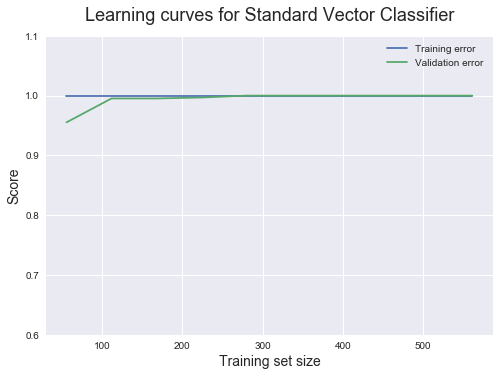

In [27]:
train_scores_mean_odor = np.mean(train_scores_odor, axis=1)
validation_scores_mean_odor = np.mean(validation_scores_odor, axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes_odor, train_scores_mean_odor, label = 'Training error')
plt.plot(train_sizes_odor, validation_scores_mean_odor, label = 'Validation error')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Standard Vector Classifier', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.1)